Exercise 1/a

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1/(1+x**2)

def p_n(x, X, n, i): #x -> fixed point; X -> vector of interpolation points; n -> degree
    Pi = 1
    for xj in X:
        if X[i] != xj:
            Pi *=  (x - xj)/(X[i] - xj)
    return Pi 

def p(x, n):
    sum = 0
    X = np.linspace(-5, 5, n+1)
    for i in range(n+1):
        sum += p_n(x, X, n, i) * f(X[i])
    return sum

Errors of the Lagrange interpolation:
[0.6462285423402674, 0.4383497951290457, 0.616925958093175, 1.0451705181610051, 1.9156331475012054, 3.6629347001409314, 7.192324287742117, 14.386760399174566, 29.18620706370296, 59.76839905919208, 123.61807766056724, 257.2124748103321]


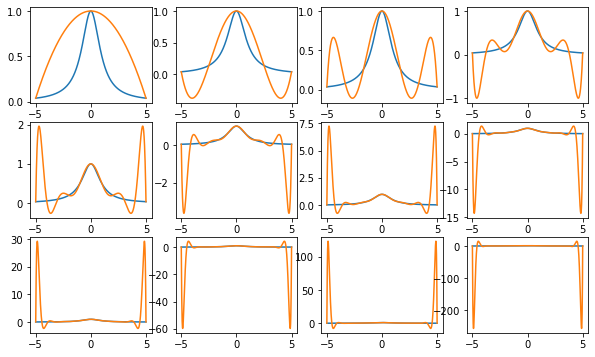

In [20]:
f_x = np.linspace(-5, 5, 1000)
f_y = []
for i in f_x:
    f_y.append(f(i))

distances = []
plt.figure(figsize=(10,6))

for i in range(2, 26, 2):
    p_y = []
    for j in f_x:
        p_y.append(p(j, i))
    
    plt.subplot(3,4, i//2)
    plt.plot(f_x, f_y)
    plt.plot(f_x, p_y)
    distances.append(np.max(np.abs(np.asarray(f_y) - np.asarray(p_y))))
print('Errors of the Lagrange interpolation:')
print(distances)
#plt.legend(['Original function', 'Lagrange interpolation'], loc=4) -> ugly :(

Blue: original function
Orange: Lagrange interpolation with equidistant points

Exercise 1/b

In [21]:
def Chebisev_points(a, b, n):
    x = []
    for j in range(n):
        t = np.cos(((2*j+1)*np.pi)/(2*n))
        x.append(0.5*(b-a)*t - 0.5*(b+a))
    return x

def p_ch(x, n):
    sum = 0
    X = Chebisev_points(-5, 5, n+1)
    for i in range(n+1):
        sum += p_n(x, X, n, i) * f(X[i])
    return sum

Errors of the Lagrange interpolation:
[0.6005907574726147, 0.40200211397382946, 0.26422005707641466, 0.17082961537241315, 0.10915277505555054, 0.06921534016218034, 0.04659904382793595, 0.03260555280101013, 0.022490026837311383, 0.01532832548930363, 0.010355861473420713, 0.006945942607729516]


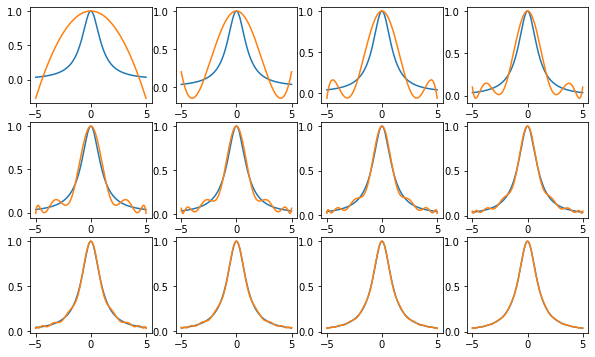

In [23]:
f_x = Chebisev_points(-5, 5, 1000)
f_y = []
for i in f_x:
    f_y.append(f(i))

distances = []
plt.figure(figsize=(10,6))
for i in range(2, 26, 2):
    p_y = []
    for j in f_x:
        p_y.append(p_ch(j, i))
    
    plt.subplot(3,4, i//2)
    plt.plot(f_x, f_y)
    plt.plot(f_x, p_y)
    distances.append(np.max(np.abs(np.asarray(f_y) - np.asarray(p_y))))
print('Errors of the Lagrange interpolation:')
print(distances)

Blue: original function
Orange: Lagrange interpolation with equidistant points

Exercise 2:

In [31]:
def f2(x,t):
    return np.sin(5*np.pi*x)*np.cos(10*np.pi*t) + 2*np.sin(7*np.pi*x)*np.cos(14*np.pi*t)

def linspline(x, y, x0):
    n = len(x)
    for i in range(n - 1):
        if x[i] <= x0  and x0 <= x[i + 1]:
            return (y[i + 1] - y[i]) / (x[i + 1] - x[i]) * (x0 - x[i]) + y[i]

In [85]:

x1 = np.linspace(0,1,51)
t = np.linspace(0,1,51)
x2 = np.linspace(0,1,1000)

for i in t:
        y1 = f2(x1, i)
        y2 = f2(x2, i)
        all_y = []
        for j in x1:
            all_y.append(linspline(x1, y1, j))
        #plt.plot(x1, all_y, 'b')
        #plt.plot(x2, y2, 'r')
        #plt.show()
        #plt.pause(0.1)

#Plotting is in another (.py) file, since Jupiter notebook can not handle animations :(

 